# Chapter 5 - Definitely Maybe: Probability and Distributions

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random

## Coin Experiment

In [4]:
# Define a function `coinFlip` to simulate coin flips
def coinFlip(nflips=100):                   
    flips = np.zeros(nflips)                     # Initialize an array of zeros with size `nflips` to store results
    for value in range(nflips):                  # Iterate over the range of `nflips`
        flips[value] = random.choice([0, 1])     # Randomly assign 0 (tails) or 1 (heads) for each flip
    return flips                                 # Return the array of flip results

In [5]:
t1, t2, t3 = coinFlip(), coinFlip(), coinFlip()  # Simulate three separate series of coin flips

np.sum(t1), np.sum(t2), np.sum(t3)               # Calculate and return the total number of 'heads' (1s) for each series

(53.0, 60.0, 54.0)

In [6]:
# Define a function `coinExperiment` to perform multiple coin-flipping trials
def coinExperiment(ntrials):                  
    results = np.zeros(ntrials)                  # Initialize an array of zeros to store the results of each trial
    for trial in range(ntrials):                 # Iterate over the number of trials
        f = coinFlip()                           # Simulate a series of coin flips using `coinFlip`
        results[trial] = np.sum(f)               # Store the total number of 'heads' (1s) in the current trial
    return results                               # Return the array of results

In [7]:
ntrials = [100, 250, 1000, 10000]        # Define a list of trial counts for the coin-flipping experiment
r = []                                   # Initialize an empty list to store the results for each trial count

for i, n in enumerate(ntrials):          # Iterate through the trial counts with their index
    r.append(coinExperiment(n))          # Perform the coin experiment for `n` trials and append the results to `r`

In [8]:
for i in r:                                             # Iterate over the list of results from the coin experiments
    print(i.mean() / 100, i.var() / 100, i.std() / 10)  # Print the mean, variance, and standard deviation of each result
                                                        # Scaled by 100 or 10 as specified

0.506 0.21760000000000004 0.46647615158762407
0.49939999999999996 0.278884 0.5280946884792537
0.49777 0.26049271 0.5103848645874993
0.49952599999999997 0.24078953240000003 0.4907031000513447


Another way:

In [10]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define coinFlip function
def coinFlip(nflips=100):
    return np.array([random.choice([0, 1]) for _ in range(nflips)])

# Define coinExperiment function
def coinExperiment(ntrials):
    return np.array([np.sum(coinFlip()) for _ in range(ntrials)])

# Simulate results
ntrials = [100, 250, 1000, 10000]
results = [coinExperiment(n) / n for n, n_trials in zip(ntrials, ntrials)]  # Calculate fraction of heads

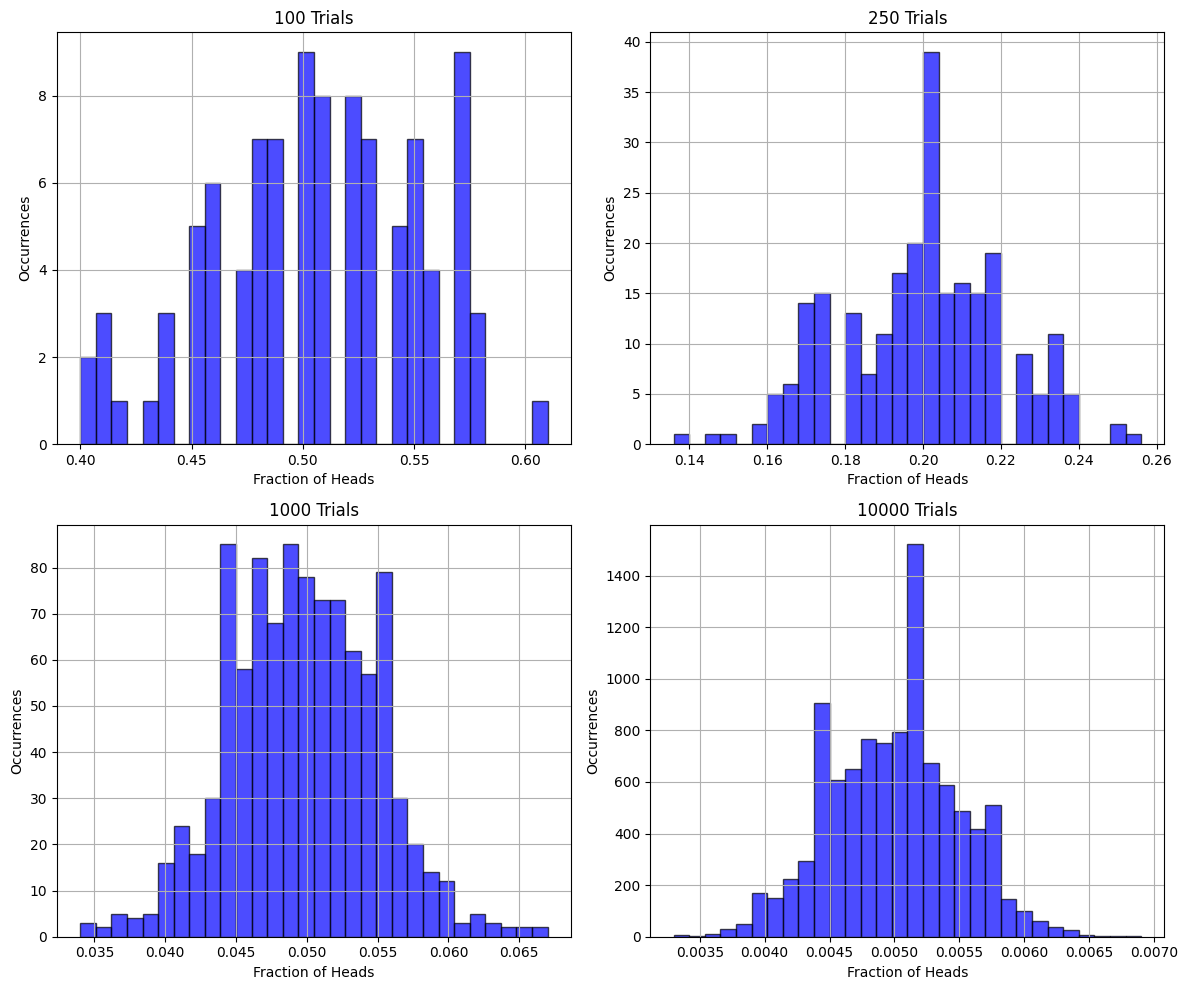

In [11]:
# Create a figure with 4 subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the axes for easier indexing

# Plot histograms for each trial count
for idx, (ax, r, n) in enumerate(zip(axes, r, ntrials)):
    ax.hist(r / n, bins=30, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{n} Trials')
    ax.set_xlabel('Fraction of Heads')
    ax.set_ylabel('Occurrences')
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Uniform Distribution - Dice Throw

In [13]:
from scipy.stats import uniform

# Uniform Distribution

x = np.arange(1, 7)  # Create an array of integers from 1 to 6 (inclusive)

print(x)             # Print the array

[1 2 3 4 5 6]


In [14]:
# Probability Density Function

pdf = uniform.pdf(x, 0, 6)  # pdf(x, loc, scale), the distribution is uniform on [0, 1]

print(pdf)                  # probability of each side = 1/6

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [15]:
# Cumulative Distribution Function

cdf = uniform.cdf(x, 0, 6)  # Compute the CDF of a uniform distribution for `x` with bounds 0 and 6

print(cdf)                  # Output the CDF values

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


In [16]:
# Percent-Point Function, also known as the Inverse Cumulative Distribution Function (Inverse CDF)

probs = np.arange(0, 1.1, 0.1)        # Generate an array of probabilities from 0 to 1 (inclusive) in steps of 0.1

ppf = uniform.ppf(probs, 0, 6)        # Calculate the Percent-Point Function (PPF) for a uniform distribution with bounds 0 and 6

print(ppf)                            # Print the PPF values corresponding to the probabilities

[0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4 6. ]


In [17]:
# Generate random variates that follow the uniform distribution

x1 = uniform.rvs(1, 6, 10000)     # Generate 10,000 random samples from a uniform distribution with bounds 1 and 6

x1 = x1.astype(int)               # Convert the random samples to integers (truncate decimal part)

print(x1)                         # Print the integer samples

[3 6 5 ... 6 3 2]


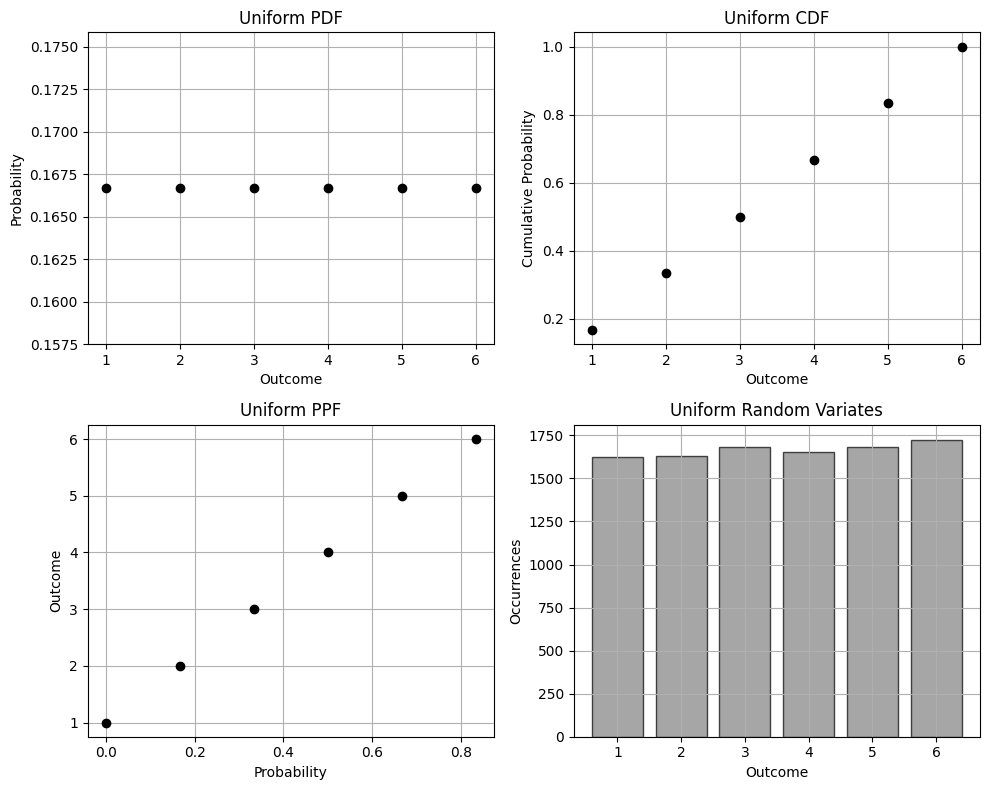

In [18]:
# Define the uniform distribution parameters
low, high = 1, 7                               # Lower and upper bounds of the uniform distribution
x = np.arange(low, high)                       # Generate discrete values for outcomes (1 through 6)

# Compute probabilities
pdf = np.ones_like(x) / (high - low)           # Uniform PDF: constant probability for all outcomes
cdf = np.cumsum(pdf)                           # Cumulative distribution function (CDF)

# Generate random variates
random_variates = np.random.uniform(low, high, 10000)  # Generate 10,000 random samples from the uniform distribution
hist, bins = np.histogram(random_variates, bins=np.arange(low, high + 1))  # Histogram for the random samples

# Inverse CDF (Percent-point function, PPF)
ppf = (x - low) / (high - low)                 # Compute the PPF for uniform distribution

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # Create a 2x2 grid for the subplots
axes = axes.flatten()                          # Flatten axes for easier access

# Plot the PDF
axes[0].plot(x, pdf, 'ko')                     # Plot PDF with black dots
axes[0].set_title("Uniform PDF")               # Title for the PDF graph
axes[0].set_xlabel("Outcome")                  # Label for x-axis
axes[0].set_ylabel("Probability")              # Label for y-axis
axes[0].grid(True)                             # Enable grid

# Plot the CDF
axes[1].plot(x, cdf, 'ko')                     # Plot CDF with black dots
axes[1].set_title("Uniform CDF")               # Title for the CDF graph
axes[1].set_xlabel("Outcome")                  # Label for x-axis
axes[1].set_ylabel("Cumulative Probability")   # Label for y-axis
axes[1].grid(True)                             # Enable grid

# Plot the PPF
axes[2].plot(ppf, x, 'ko')                     # Plot PPF with black dots
axes[2].set_title("Uniform PPF")               # Title for the PPF graph
axes[2].set_xlabel("Probability")              # Label for x-axis
axes[2].set_ylabel("Outcome")                  # Label for y-axis
axes[2].grid(True)                             # Enable grid

# Plot the histogram of random variates
axes[3].bar(bins[:-1], hist, color='gray', edgecolor='black', alpha=0.7)  # Plot histogram as a bar chart
axes[3].set_title("Uniform Random Variates")   # Title for the histogram
axes[3].set_xlabel("Outcome")                  # Label for x-axis
axes[3].set_ylabel("Occurrences")              # Label for y-axis
axes[3].grid(True)                             # Enable grid

# Adjust layout and show the plot
plt.tight_layout()                             # Adjust layout to prevent overlap
plt.show()                                     # Display the plot

In [19]:
# Generate random variates that follow the uniform distribution

x1 = uniform.rvs(1, 6, 10000)     # Generate 10,000 random samples from a uniform distribution with bounds 1 and 6
x1 = x1.astype(int)               # Convert the random samples to integers (truncate decimal part)

x1.mean(), x1.var()               # Give mean and standard variation of this collection

(3.4973, 2.87279271)

In [20]:
# Theorical values

n = 6        # Set the value of n to 6
L = 1        # Set the value of L to 1

u_mean = (n - 1) / 2 + L           # Calculate the mean for the uniform distribution
u_var = (n**2 - 1) / 12            # Calculate the variance for the uniform distribution

print("Mean:", round(u_mean,2))                 # Print the calculated mean
print("Standard Variation:", round(u_var,2))    # Print the calculated variance

Mean: 3.5
Standard Variation: 2.92


## Bernoulli Distribution

$$
f(x) = p^x (1 - p)^{1-x}, \quad \text{for } x \in \{0, 1\}
$$

In [23]:
from scipy.stats import bernoulli

x = np.array([0, 1])                # Define an array representing possible outcomes (0 and 1)

pmf = bernoulli.pmf(x, 0.12)        # Calculate the PMF (Probability Mass Function) of the Bernoulli distribution
                                    # with success probability p = 0.12 for outcomes in x

print(pmf)                          # Print the PMF values for outcomes 0 and 1

[0.88 0.12]


For $( x = 0 )$:
$$
f(0) = (0.12)^0 \cdot (1 - 0.12)^1 = 1 \cdot 0.88 = 0.88
$$

For $( x = 1 )$:  
$$
f(1) = (0.12)^1 \cdot (1 - 0.12)^0 = 0.12 \cdot 1 = 0.12
$$

The first value (0.88) is the probability of failure (x=0).

The second value (0.12) is the probability of success (x=1).

In [25]:
cdf = bernoulli.cdf(x, 0.12)  # Calculate the cumulative distribution function (CDF) for the Bernoulli distribution
                              # with success probability p = 0.12 for outcomes in x (0 and 1)

print(cdf)                    # Print the CDF values for outcomes 0 and 1

[0.88 1.  ]


### Explanation of CDF for Bernoulli Distribution

The **Cumulative Distribution Function (CDF)**, \(F(x)\), gives the probability that a random variable \(X\) is less than or equal to \(x\):
$$
F(x) = P(X \leq x)
$$

For a Bernoulli distribution with success probability \(p = 0.12\):
- $P(X = 0) = 1 - p = 0.88$
- $P(X = 1) = p = 0.12$

The CDF accumulates these probabilities as follows:
1. For $(x = 0)$:  
   $$
   F(0) = P(X \leq 0) = P(X = 0) = 0.88
   $$

2. For $(x = 1)$:  
   $$
   F(1) = P(X \leq 1) = P(X = 0) + P(X = 1) = 0.88 + 0.12 = 1.0
   $$

### Result Interpretation
- **0.88**: The probability that $(X \leq 0$) is $0.88$ (only $(P(X = 0)$)).
- **1.0**: The probability that $(X \leq 1$) is $1.0$ (sum of $P(X = 0)$ and $P(X = 1)$).

This is consistent with the properties of a Bernoulli distribution, where the probabilities always sum up to 1.


In [27]:
probs = np.array([0.88, 1.0])         # Define an array of cumulative probabilities (0.88 and 1.0)

ppf = bernoulli.ppf(probs, 0.12)      # Calculate the Percent-Point Function (PPF) for the Bernoulli distribution
                                      # with success probability p = 0.12, returning the values of x corresponding to these probabilities

print(ppf)                            # Print the values of x (outcomes) that correspond to the given cumulative probabilities

[0. 1.]


The **Percent-Point Function (PPF)** is the inverse of the **Cumulative Distribution Function (CDF)**.

For $P(X \leq x) = 0.88$, the corresponding $x = 0$ (failure).  

For $P(X \leq x) = 1.0$, the corresponding $x = 1$ (success).

In [29]:
x1 = bernoulli.rvs(0.12, size=10000)  # Generate 10,000 random samples from a Bernoulli distribution with p = 0.12

print(x1.mean(), x1.var())            # Print the mean and variance of the generated samples

0.1203 0.10582791000000003


In [30]:
# Theorical Values

print("Bernoulli Mean:",bernoulli.mean(0.12))
print("Bernoulli Standard Variation:",bernoulli.var(0.12))

Bernoulli Mean: 0.12
Bernoulli Standard Variation: 0.1056


## Binomial Distribution

### Binomial Coefficient
The **binomial coefficient** is given by the formula:
$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$
- It represents the number of ways to choose $k$ successes from $n$ trials.

### Probability Mass Function (PMF) for the Binomial Distribution
The **PMF** for the binomial distribution is:
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$
- $P(X = k)$: The probability of $k$ successes in $n$ independent trials.
- $p$: The probability of success in a single trial.
- $1-p$: The probability of failure in a single trial.

### Explanation
- The **binomial coefficient** $\binom{n}{k}$ counts the combinations of $k$ successes in $n$ trials.
- The **PMF** calculates the probability of observing exactly $k$ successes, considering the probabilities of success ($p$) and failure ($1-p$) for $n$ trials.

#### Example

Suppose you are a quality control manager at a factory that produces widgets. Each widget passes a quality test with a probability of 
0.5 (success) due to high variation in the manufacturing process. You randomly inspect 3 widgets. You want to calculate the probability that none of the 3 widgets pass the quality test.

In [34]:
from scipy.stats import binom

# Probability of no widgets passing the test
probability = binom.pmf(0, 3, 0.5)  # 0 successes, 3 trials, p = 0.5

print(f"Probability of no widgets passing the test: {probability:.3f}")

Probability of no widgets passing the test: 0.125


In [35]:
x = np.arange(0, 100, 1)            # Create an array of integers from 0 to 99, representing possible numbers of successes

pmf = binom.pmf(x, 100, 0.5)        # Compute the Probability Mass Function (PMF) for a binomial distribution
                                    # with n = 100 trials, success probability p = 0.5, for all values in x

cdf = binom.cdf(x, 100, 0.5)        # Compute the Cumulative Distribution Function (CDF) for the same distribution
                                    # summing probabilities up to each value in x

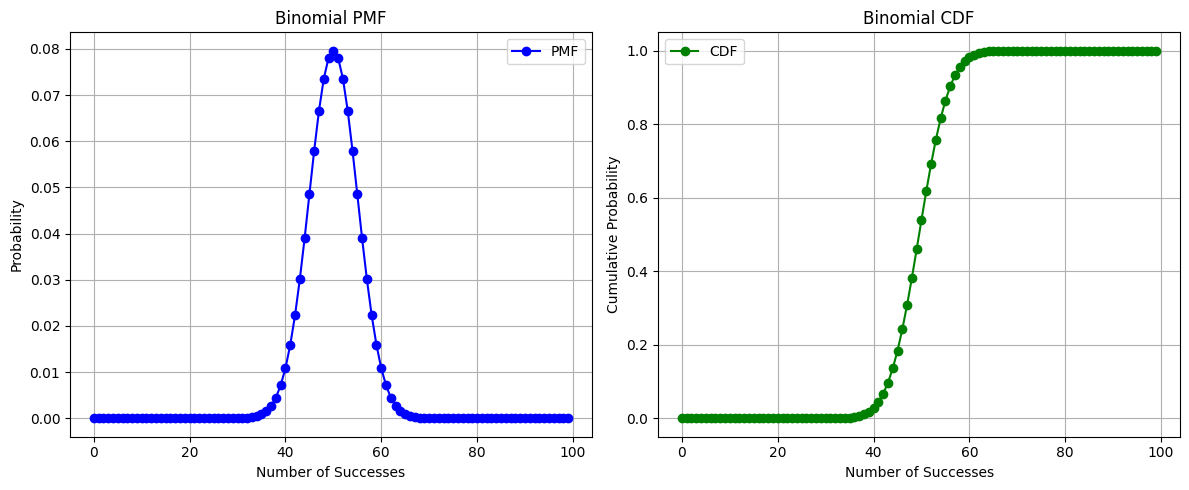

In [36]:
# Create the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PMF
axes[0].plot(x, pmf, 'bo-', label='PMF')  # Plot the PMF with blue circles and lines
axes[0].set_title('Binomial PMF')        # Title for the PMF plot
axes[0].set_xlabel('Number of Successes')# X-axis label
axes[0].set_ylabel('Probability')        # Y-axis label
axes[0].grid(True)                       # Enable grid for the PMF plot
axes[0].legend()                         # Add a legend to the PMF plot

# Plot CDF
axes[1].plot(x, cdf, 'go-', label='CDF') # Plot the CDF with green circles and lines
axes[1].set_title('Binomial CDF')        # Title for the CDF plot
axes[1].set_xlabel('Number of Successes')# X-axis label
axes[1].set_ylabel('Cumulative Probability') # Y-axis label
axes[1].grid(True)                       # Enable grid for the CDF plot
axes[1].legend()                         # Add a legend to the CDF plot

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [37]:
probs = np.arange(0, 1, 0.01)     # Create an array of probabilities from 0 to 0.99 in steps of 0.01

ppf = binom.ppf(probs, 100, 0.5)  # Calculate the Percent-Point Function (PPF) for a binomial distribution
                                  # with n = 100 trials and success probability p = 0.5

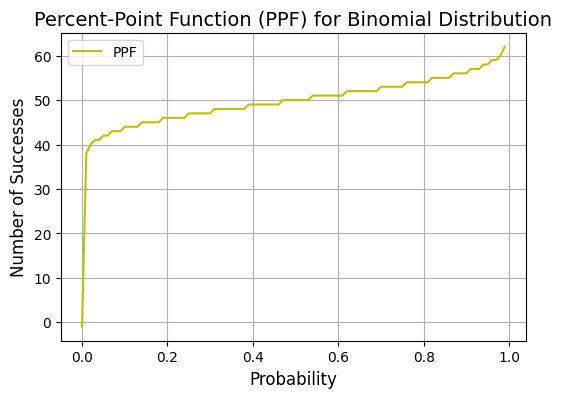

In [38]:
# Plot the PPF graph
plt.figure(figsize=(6, 4))
plt.plot(probs, ppf, 'y-', label='PPF')                                           # Plot PPF with a blue line
plt.title('Percent-Point Function (PPF) for Binomial Distribution', fontsize=14)  # Add title
plt.xlabel('Probability', fontsize=12)                                            # Label for the x-axis
plt.ylabel('Number of Successes', fontsize=12)                                    # Label for the y-axis
plt.grid(True)                                                                    # Enable grid for better readability
plt.legend(fontsize=10)                                                           # Add legend to the plot
plt.show()                                                                        # Display the plot

In [39]:
x1 = binom.rvs(n=100, p=0.5, size=10000)  # Generate 10,000 random samples from a binomial distribution
                                          # with n = 100 trials and success probability p = 0.5

# Print the mean and unbiased sample variance of the generated samples
print("Binomial Mean:",round(x1.mean(),2))
print("Binomial Standard Variation:",round(x1.var(),2))   
print("Binomial Standard Deviation:",round(x1.std(),2))   

Binomial Mean: 50.0
Binomial Standard Variation: 24.77
Binomial Standard Deviation: 4.98


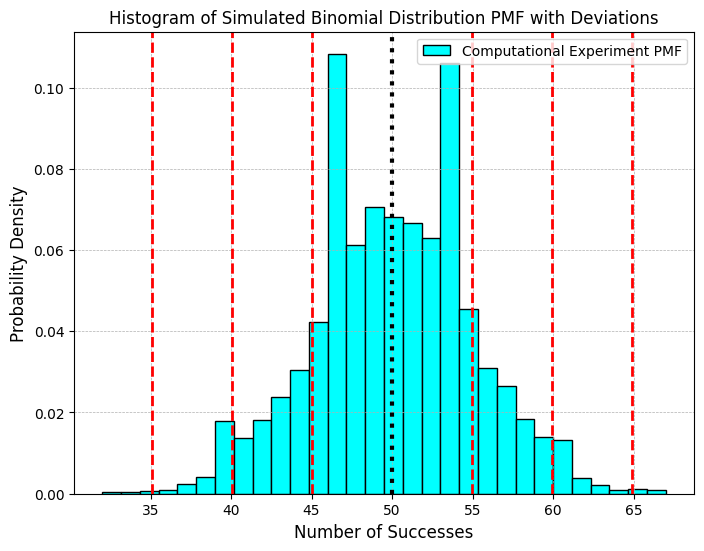

In [40]:
# Plot the results
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram of simulated PMF with density normalization
plt.hist(x1, bins=30, density=True, edgecolor='black', color= 'cyan', label="Computational Experiment PMF")  

plt.axvline(np.mean(x1), linestyle=':', color='black', linewidth=3)  # Add a vertical dashed line at the mean

# Iterate over the first three standard deviations (±1σ, ±2σ, ±3σ)
for i in range(3):  
    
    # Add vertical lines for positive deviations (mean + n*std)
    plt.axvline(np.mean(x1) + (i+1)*np.std(x1),          # Location: mean + n*std
                linestyle='--',                          # Use the corresponding line style
                linewidth=2,                             # Set line width for visibility
                color='red')                             # Use red for better contrast
    
    # Add vertical lines for negative deviations (mean - n*std)
    plt.axvline(np.mean(x1) - (i+1)*np.std(x1),          # Location: mean - n*std
                linestyle='--',                          # Use the corresponding line style
                linewidth=2,                             # Set line width for visibility
                color='red')                             # Use red for better contrast

# Add title and axis labels
plt.title('Histogram of Simulated Binomial Distribution PMF with Deviations', fontsize=12)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

plt.grid(visible=True, linestyle="--", linewidth=0.5)    # Add gridlines

plt.legend();  # Add a legend

## Hypergeometric Distribution

### Hypergeometric Distribution PMF Calculation

The **hypergeometric distribution** calculates probabilities when sampling without replacement from a finite population.

#### Formula:
$$
P(X = k) = \frac{\binom{n}{k} \binom{M - n}{N - k}}{\binom{M}{N}}
$$
Where:
- \(M\): Population size (1000 in this case)
- \(n\): Total number of successes in the population (425)
- \(N\): Sample size (10)
- \(k\): Desired number of successes in the sample (3)

When the population N is large, the hypergeometric distribution approximates the binomial.

#### Scenario:
A factory produces 1,000 widgets (M=1000), and 425 of them are defective (n=425). You randomly select 10 widgets (N=10) for inspection. You want to find the probability that exactly 3 of the selected widgets are defective (k=3).

In [45]:
from scipy.stats import hypergeom

result = hypergeom.pmf(3, 1000, 425, 10)

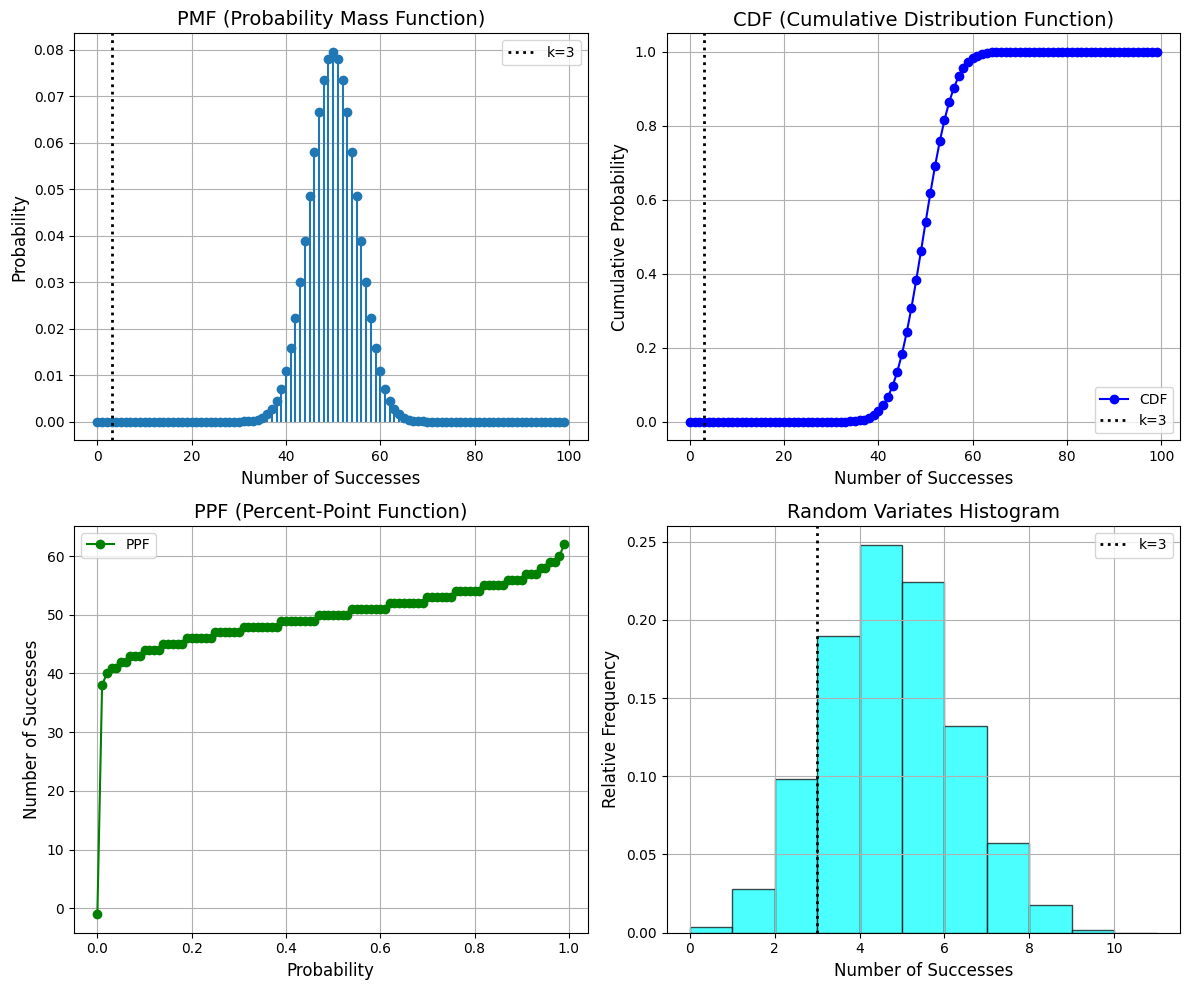

In [46]:
# Define k=3 again as it seems to have been lost in the context
result_k3 = 3  # The specific number of successes to highlight (k=3)

# Parameters for the hypergeometric distribution
M = 1000  # Population size
n = 425   # Number of successes in the population
N = 10    # Sample size

# Generate random variates
rvs = hypergeom.rvs(M, n, N, size=10000)

# Create subplots with vertical dashed lines for relevant graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for subplots

# Plot PMF
axes[0, 0].stem(x, pmf, basefmt=" ")
axes[0, 0].axvline(result_k3, linestyle=':', color='black', linewidth=2, label=f'k={result_k3}')
axes[0, 0].set_title('PMF (Probability Mass Function)', fontsize=14)
axes[0, 0].set_xlabel('Number of Successes', fontsize=12)
axes[0, 0].set_ylabel('Probability', fontsize=12)
axes[0, 0].grid(True)
axes[0, 0].legend(fontsize=10)

# Plot CDF
axes[0, 1].plot(x, cdf, 'bo-', label='CDF')
axes[0, 1].axvline(result_k3, linestyle=':', color='black', linewidth=2, label=f'k={result_k3}')
axes[0, 1].set_title('CDF (Cumulative Distribution Function)', fontsize=14)
axes[0, 1].set_xlabel('Number of Successes', fontsize=12)
axes[0, 1].set_ylabel('Cumulative Probability', fontsize=12)
axes[0, 1].grid(True)
axes[0, 1].legend(fontsize=10)

# Plot PPF
axes[1, 0].plot(probs, ppf, 'go-', label='PPF')
axes[1, 0].set_title('PPF (Percent-Point Function)', fontsize=14)
axes[1, 0].set_xlabel('Probability', fontsize=12)
axes[1, 0].set_ylabel('Number of Successes', fontsize=12)
axes[1, 0].grid(True)
axes[1, 0].legend(fontsize=10)

# Plot Random Variates (Histogram)
axes[1, 1].hist(rvs, bins=range(0, N + 2), density=True, color='cyan', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(result_k3, linestyle=':', color='black', linewidth=2, label=f'k={result_k3}')
axes[1, 1].set_title('Random Variates Histogram', fontsize=14)
axes[1, 1].set_xlabel('Number of Successes', fontsize=12)
axes[1, 1].set_ylabel('Relative Frequency', fontsize=12)
axes[1, 1].grid(True)
axes[1, 1].legend(fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Poisson Distribution

### Scenario:
A store observes that, on average, 2 customers enter per minute (λ=2). You want to calculate the probabilities of observing exactly 0, 1, 2, or 3 customers entering in a given minute.

In [49]:
from scipy.stats import poisson

for r in range(0, 4):                               # Loop through values of r from 0 to 3
    print(f"{r}: {poisson.pmf(r, 2):.4f}")          # Calculate and print PMF for r with lambda (mean) = 2

0: 0.1353
1: 0.2707
2: 0.2707
3: 0.1804


    0 customers in 1 minute: Probability is 13.53% (P(X=0)).
    1 customer in 1 minute: Probability is 27.07% (P(X=1)).
    2 customers in 1 minute: Probability is 27.07% (P(X=2)).
    3 customers in 1 minute: Probability is 18.04% (P(X=3)).

### Explanation

`poisson.pmf(r, 2):`

This computes the **Probability Mass Function (PMF)** for the Poisson distribution with $( \lambda = 2 )$ (mean or expected value).

#### PMF Formula:
$$
P(X = r) = \frac{\lambda^r e^{-\lambda}}{r!}
$$

Here:
- $( r )$: The number of events.
- $( \lambda = 2 )$: The average rate of events.

#### `range(0, 4):`
Iterates over $( r = 0, 1, 2, 3 )$.

#### Output:
This prints the PMF values for $(r = 0, 1, 2, 3)$ with $( \lambda = 2)$. For example:
- $P(X = 0) $
- $P(X = 1) $
- $P(X = 2) $
- $P(X = 3) $


### Scenario:
A call center receives, on average, 5 calls per minute (λ=5). The management team wants to understand the probabilities of receiving a specific number of calls in a given minute to plan staffing needs effectively.

### Application of the Poisson Distribution

The Poisson distribution can model this scenario because:
1. Calls arrive randomly and independently.
2. The average number of calls per minute is constant $( \lambda = 5)$.
3. The number of calls is discrete.

### Example Questions

#### 1. What is the probability of receiving exactly 3 calls in a minute?
Use:
$$
P(X = 3) = \frac{\lambda^3 e^{-\lambda}}{3!}
$$
Substitute $( \lambda = 5 )$:
$$
P(X = 3) = \frac{5^3 e^{-5}}{3!} = 0.14037 \, (14.04\%)
$$

#### 2. What is the probability of receiving more than 7 calls in a minute?
Sum probabilities for $( X > 7 )$:
$$
P(X > 7) = 1 - P(X \leq 7) = 1 - \text{CDF}(7)
$$

#### 3. How many calls are most likely to be received in a minute?
The most probable value corresponds to the **mode**, which is approximately:
$$
\lfloor \lambda \rfloor = 5
$$


In [54]:
from scipy.stats import poisson

# Parameters
lmbda = 5  # Average number of calls

# 1. Probability of receiving exactly 3 calls
p_exact_3 = poisson.pmf(3, lmbda)

# 2. Probability of receiving more than 7 calls
p_more_than_7 = 1 - poisson.cdf(7, lmbda)

# 3. Most probable number of calls (mode)
most_probable_calls = int(lmbda)  # For Poisson, mode is approximately floor(lambda)

# Print results
print(f"1. Probability of exactly 3 calls: {p_exact_3:.4f} ({p_exact_3:.2%})")
print(f"2. Probability of more than 7 calls: {p_more_than_7:.4f} ({p_more_than_7:.2%})")
print(f"3. Most probable number of calls: {most_probable_calls} calls")

1. Probability of exactly 3 calls: 0.1404 (14.04%)
2. Probability of more than 7 calls: 0.1334 (13.34%)
3. Most probable number of calls: 5 calls


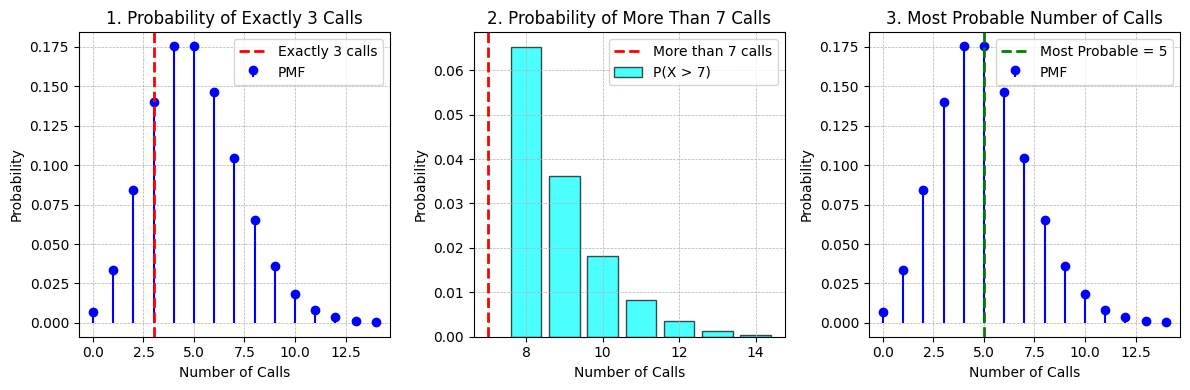

In [55]:
# Parameters
lmbda = 5  # Average number of calls
x = np.arange(0, 15)  # Range for possible calls

# PMF values
pmf_values = poisson.pmf(x, lmbda)

# 1. Plot for exactly 3 calls
plt.figure(figsize=(12, 4))

# Plot 1: Probability of exactly 3 calls
plt.subplot(1, 3, 1)
plt.stem(x, pmf_values, basefmt=" ", linefmt='blue', markerfmt='bo', label='PMF')
plt.axvline(3, color='red', linestyle='--', label='Exactly 3 calls', linewidth=2)
plt.title('1. Probability of Exactly 3 Calls', fontsize=12)
plt.xlabel('Number of Calls', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Plot 2: Probability of more than 7 calls
plt.subplot(1, 3, 2)
more_than_7 = np.arange(8, 15)
plt.bar(more_than_7, pmf_values[more_than_7], color='cyan', edgecolor='black', alpha=0.7, label='P(X > 7)')
plt.axvline(7, color='red', linestyle='--', label='More than 7 calls', linewidth=2)
plt.title('2. Probability of More Than 7 Calls', fontsize=12)
plt.xlabel('Number of Calls', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Plot 3: Most probable number of calls
plt.subplot(1, 3, 3)
plt.stem(x, pmf_values, basefmt=" ", linefmt='blue', markerfmt='bo', label='PMF')
plt.axvline(lmbda, color='green', linestyle='--', label=f'Most Probable = {lmbda}', linewidth=2)
plt.title('3. Most Probable Number of Calls', fontsize=12)
plt.xlabel('Number of Calls', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

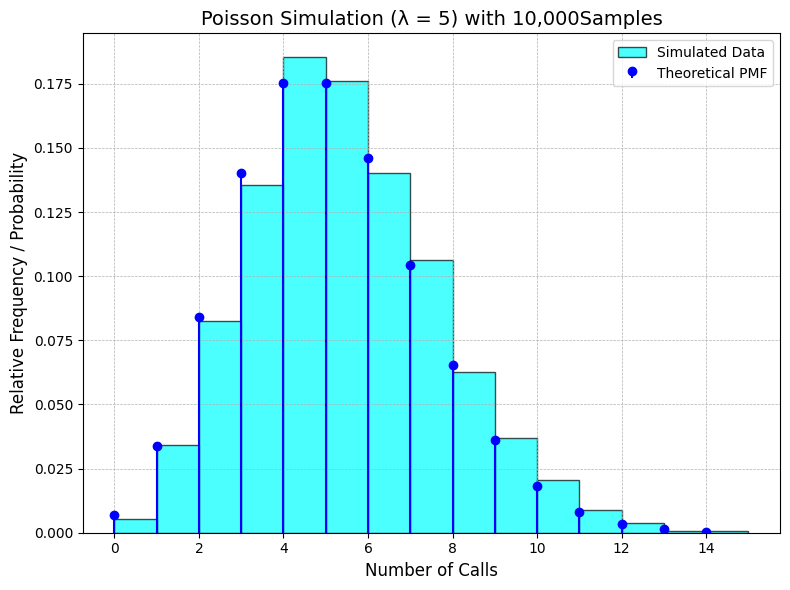

In [119]:
# Simulate 10,000 random variates from a Poisson distribution with λ = 5
simulation = poisson.rvs(mu=5, size=10000)

# Plot the histogram of the simulated data
plt.figure(figsize=(8, 6))
plt.hist(simulation, bins=range(0, 16), density=True, color='cyan', edgecolor='black', alpha=0.7, label='Simulated Data')

# Overlay the theoretical PMF
x = np.arange(0, 15)
pmf_values = poisson.pmf(x, mu=5)
plt.stem(x, pmf_values, linefmt='blue', markerfmt='bo', basefmt=" ", label='Theoretical PMF')

# Add title and labels
plt.title('Poisson Simulation (λ = 5) with 10,000Samples', fontsize=14)
plt.xlabel('Number of Calls', fontsize=12)
plt.ylabel('Relative Frequency / Probability', fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

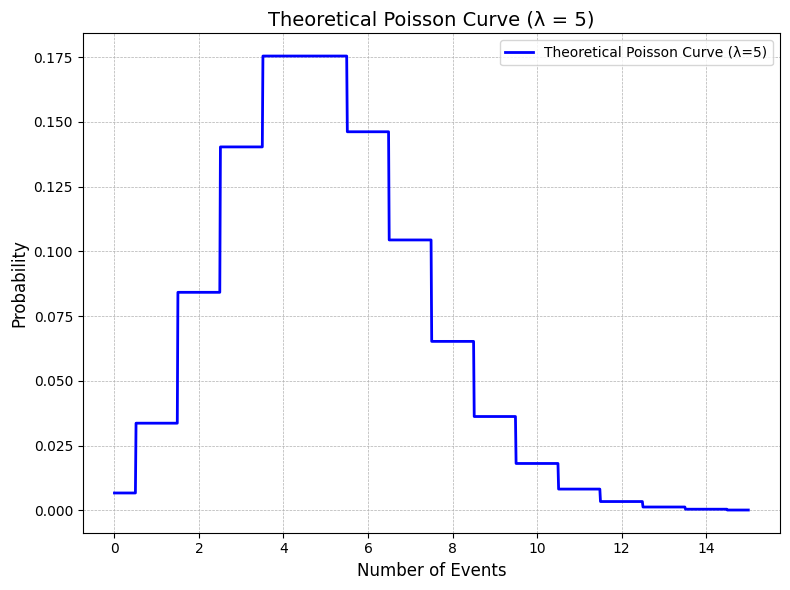

In [131]:
# Generate a fine-grained set of points for a smooth Poisson curve
x = np.linspace(0, 15, 1000)  # Generate 1000 points between 0 and 15
pmf_values = poisson.pmf(np.round(x), mu=5)  # Theoretical PMF values for Poisson with λ = 5

# Plot the Poisson curve
plt.figure(figsize=(8, 6))
plt.plot(x, pmf_values, color='blue', label='Theoretical Poisson Curve (λ=5)', linewidth=2)

# Add title and labels
plt.title('Theoretical Poisson Curve (λ = 5)', fontsize=14)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


The Poisson distribution is inherently discrete, meaning it only assigns probabilities to whole numbers (e.g., 0, 1, 2, 3). 

# Normal or Gaussian Distribution

### Normal Distribution Formula

The Probability Density Function (PDF) of the normal distribution is given by:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2\right)
$$

Where:
- $\mu$ : Mean of the distribution.
- $\sigma$ : Standard deviation.
- $x$ : Value at which the PDF is evaluated.


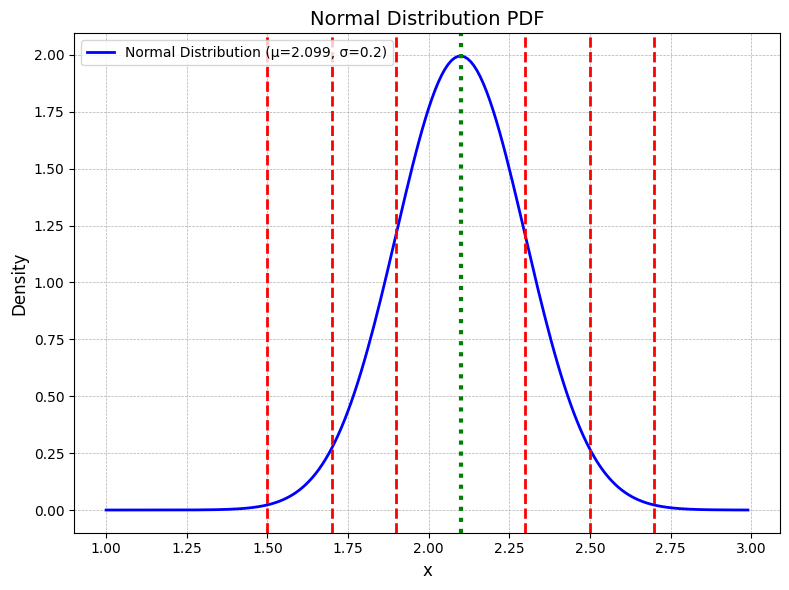

In [150]:
from scipy.stats import norm

# Parameters for the normal distribution
mu = 2.099                    # Mean
sigma = 0.2                   # Standard deviation
x = np.arange(1, 3, 0.01)     # Range of x values for the distribution
pdf = norm.pdf(x, mu, sigma)  # Calculate the Probability Density Function (PDF)

# Plot the normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Normal Distribution (μ={mu}, σ={sigma})', color='blue', linewidth=2)

plt.axvline(mu, linestyle=':', color='green', linewidth=3)  # Add a vertical dashed line at the mean

# Iterate over the first three standard deviations (±1σ, ±2σ, ±3σ)
for i in range(3):  
    
    # Add vertical lines for positive deviations (mean + n*std)
    plt.axvline(mu + (i+1)*sigma,                         # Location: mean + n*std
                linestyle='--',                          # Use the corresponding line style
                linewidth=2,                             # Set line width for visibility
                color='red')                             # Use red for better contrast
    
    # Add vertical lines for negative deviations (mean - n*std)
    plt.axvline(mu - (i+1)*sigma,                         # Location: mean - n*std
                linestyle='--',                          # Use the corresponding line style
                linewidth=2,                             # Set line width for visibility
                color='red')                             # Use red for better contrast

# Add title and labels
plt.title('Normal Distribution PDF', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()